In [1]:
# Import required Library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.cross_validation import cross_val_score
import seaborn as sns

'''
#### Description of Variables

    The dataset contains 6366 observations of 9 variables:
    
        rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
        
        age: woman's age
        
        yrs_married: number of years married
        
        children: number of children
        
        religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
        
        educ: level of education (9 = grade school, 12 = high school, 14 =some college, 16 = college graduate
        , 17 = some graduate school, 20 = advanced degree)
        
        occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =
        teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
        
        occupation_husb: husband's occupation (same coding as above)
        
        affairs: time spent in extra-marital affairs
'''

In [2]:
# Load dataset
dta = sm.datasets.fair.load_pandas().data
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


#### Map the value for given discriptive value

In [3]:
map_data = dta.copy()
map_data["rate_marriage"] = map_data["rate_marriage"].map({1: "very poor", 2:"poor",3:"medium",4:"good", 5:"very good"})
map_data["religious"] = map_data["religious"].map({1: "not religious", 2:"communal", 3:"religious",4:"strongly religious"})
map_data["educ"] = map_data["educ"].map({9 :"grade school", 12:"high school", 14:"some college", 16:"college graduate" , 17:"some graduate school", 20:"advanced degree"})
map_data["occupation"] = map_data["occupation"].map({1:"student", 2:"farming/semiskilled/unskilled", 3:"white collar", 4:"teacher/nurse/writer/technician/skilled", 5:"managerial/business", 6:"professional with advanced degree"})
map_data["occupation_husb"] = map_data["occupation_husb"].map({1:"student", 2:"farming/semiskilled/unskilled", 3:"white collar", 4:"teacher/nurse/writer/technician/skilled", 5:"managerial/business", 6:"professional with advanced degree"})
map_data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,medium,32.0,9.0,3.0,religious,some graduate school,farming/semiskilled/unskilled,managerial/business,0.111111
1,medium,27.0,13.0,3.0,not religious,some college,white collar,teacher/nurse/writer/technician/skilled,3.230769
2,good,22.0,2.5,0.0,not religious,college graduate,white collar,managerial/business,1.400000
3,good,37.0,16.5,4.0,religious,college graduate,managerial/business,managerial/business,0.727273
4,very good,27.0,9.0,1.0,not religious,some college,white collar,teacher/nurse/writer/technician/skilled,4.666666
...,...,...,...,...,...,...,...,...,...
6361,very good,32.0,13.0,2.0,religious,some graduate school,teacher/nurse/writer/technician/skilled,white collar,0.000000
6362,good,32.0,13.0,1.0,not religious,college graduate,managerial/business,managerial/business,0.000000
6363,very good,22.0,2.5,0.0,communal,some college,white collar,student,0.000000
6364,very good,32.0,6.0,1.0,religious,some college,white collar,teacher/nurse/writer/technician/skilled,0.000000


In [4]:
# Check the column data type and null value.
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [5]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


## Data visualization & analysis on Raw Data

#### Check wheather data is balanced or imbalanced?

In [6]:
y = pd.DataFrame()
#y["affairs"] = dta["affairs"].astype(int)
y["affairs"] = (dta.affairs>0).astype(int)
print("Data size for the 0 value :",y[y["affairs"]==0].shape)
print("Data size for the 1 value :",y[y["affairs"]==1].shape)

Data size for the 0 value : (4313, 1)
Data size for the 1 value : (2053, 1)


C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


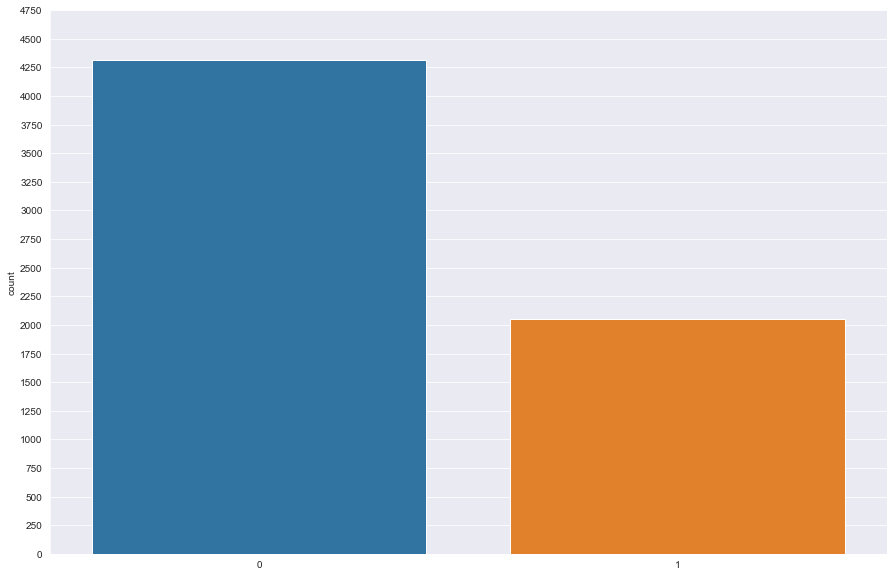

In [7]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

#### As per the above figure, class 0 count is more than double the class 1 value. So we need to up sampling the balance the dataset.

In [8]:
from imblearn.over_sampling import RandomOverSampler
rdm = RandomOverSampler()
dta_res,y_res = rdm.fit_resample(X=dta.iloc[:,:-1], y=y)
dta = pd.concat([dta_res,y_res],axis=1)
print("Data size for the 0 value :",dta[dta["affairs"]==0].shape)
print("Data size for the 1 value :",dta[dta["affairs"]==1].shape)

Data size for the 0 value : (4313, 9)
Data size for the 1 value : (4313, 9)


In [9]:
dta.iloc[:,:-1]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0
...,...,...,...,...,...,...,...,...
8621,3.0,27.0,6.0,1.0,2.0,12.0,3.0,4.0
8622,5.0,27.0,9.0,2.0,3.0,14.0,3.0,3.0
8623,4.0,42.0,13.0,0.0,1.0,14.0,5.0,5.0
8624,4.0,32.0,2.5,0.0,2.0,14.0,5.0,6.0


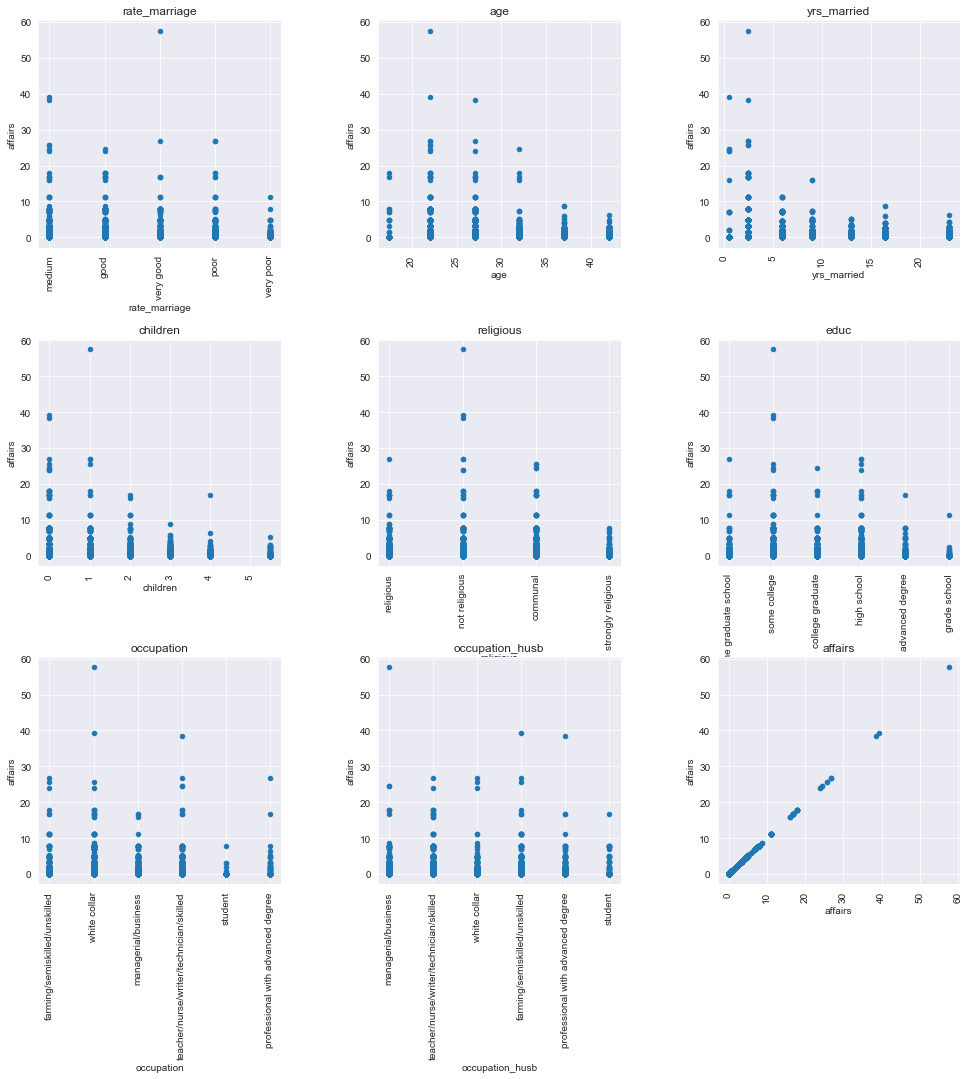

In [10]:
# Visualize the relationship between the features and the target using the scatter plot
fig, axes = plt.subplots(3,3,figsize=(16,15))
axe = axes.ravel()
for i,col in enumerate(map_data.columns.tolist()):
    map_data.plot(kind='scatter',x=col,y='affairs',ax=axe[i], title=col)
    #axe[i].set_xticklabels(axe[i].get_xticks(),rotation=45)
    axe[i].tick_params(axis='x',rotation=90)
    #plt.yticks(rotation=45)
    
    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

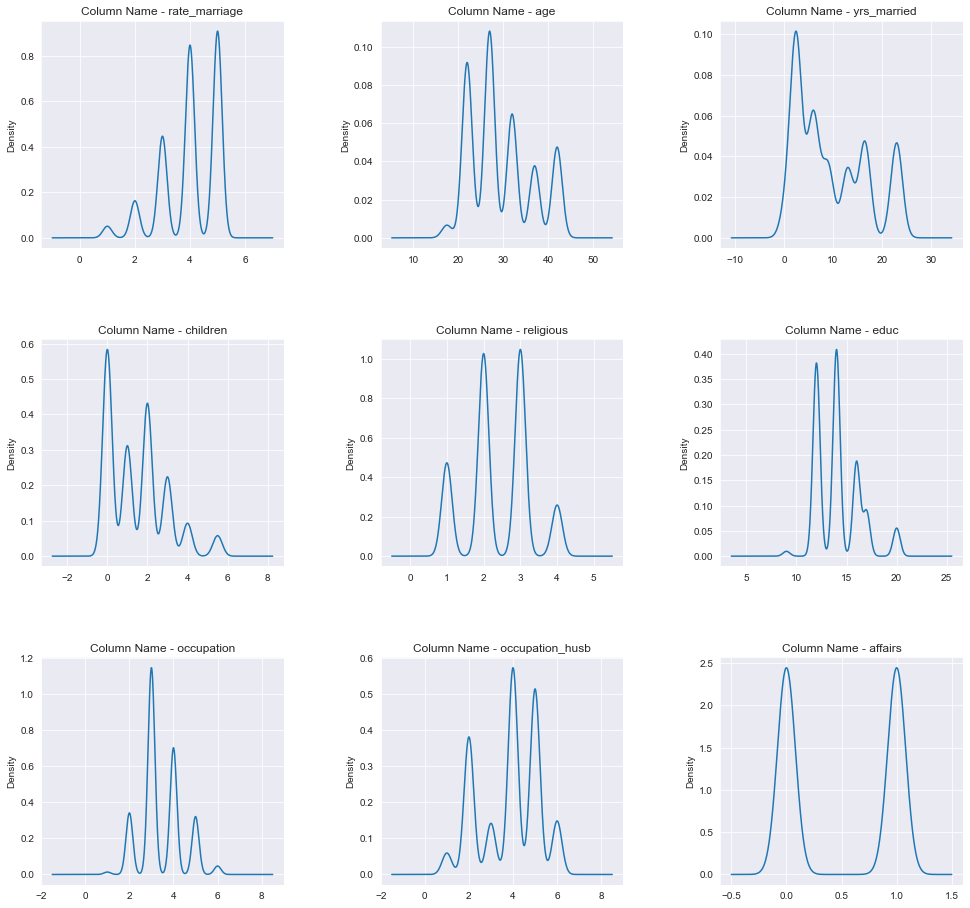

In [11]:
# Visualize the visualize the distribution for all the feature
fig, axes = plt.subplots(3,3,figsize=(16,15))
axe = axes.ravel()
for i,col in enumerate(dta.columns.tolist()):
    dta[col].plot(kind='kde',x=col,ax=axe[i],title='Column Name - {}'.format(col))

    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

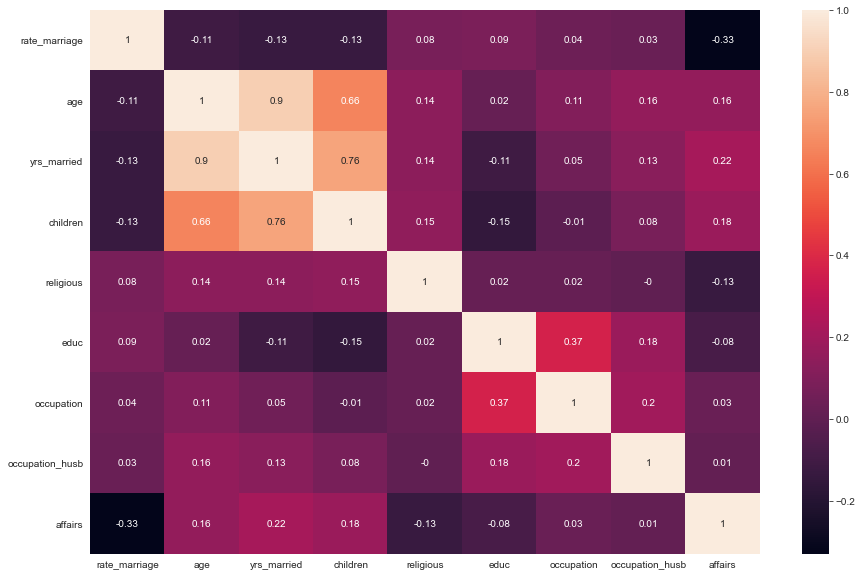

In [12]:
import seaborn as sns
plt.subplots(figsize=(15,10))
# Data correlation between independent labels before multicolinearity resolution
dta_cor = dta.corr().round(2)
dta_cor
# annot = True to print the values inside the square
sns.heatmap(data=dta_cor, annot=True)

In [13]:
# Calculate multicoliearity between data
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
    # we create a new data frame which will include all the VIFs
    # note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
    # we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
    vif = pd.DataFrame()

    # here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    # Finally, I like to include names so it is easier to explore the result
    vif["Features"] = data.columns
    return vif

#### Get the multicolinearity before standardization

In [14]:
vif = calc_vif(dta.drop(["affairs"],axis=1))
vif

,VIF,Features
0,15.049860,rate_marriage
1,76.502536,age
2,16.465620,yrs_married
3,5.001442,children
4,8.557900,religious
5,46.757169,educ
6,16.695070,occupation
7,9.928121,occupation_husb


In [15]:
vif = calc_vif(dta.drop(["affairs","educ","age","rate_marriage"],axis=1))
vif

,VIF,Features
0,6.599027,yrs_married
1,4.995788,children
2,6.561192,religious
3,9.621654,occupation
4,8.086791,occupation_husb


#### Standandardise dataset

In [16]:
import scipy.stats as stats

std_dta = pd.DataFrame()
for i,col in enumerate(dta.drop(["affairs"],axis=1).columns.tolist()):
    zc = stats.zscore(dta[col])
    std_dta[col]= zc
    
std_dta    

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,-0.982750,0.364727,-0.084506,1.051300,0.700801,1.322686,-1.510810,0.857189
1,-0.982750,-0.365066,0.461832,1.051300,-1.594230,-0.064936,-0.457529,0.111439
2,0.007115,-1.094858,-0.972306,-1.038139,-1.594230,0.860145,-0.457529,0.857189
3,0.007115,1.094520,0.939878,1.747780,0.700801,0.860145,1.649034,0.857189
4,0.996979,-0.365066,-0.084506,-0.341659,-1.594230,-0.064936,-0.457529,0.111439
...,...,...,...,...,...,...,...,...
8621,-0.982750,-0.365066,-0.494260,-0.341659,-0.446714,-0.990017,-0.457529,0.111439
8622,0.996979,-0.365066,-0.084506,0.354820,0.700801,-0.064936,-0.457529,-0.634311
8623,0.007115,1.824313,0.461832,-1.038139,-1.594230,-0.064936,1.649034,0.857189
8624,0.007115,0.364727,-0.972306,-1.038139,-0.446714,-0.064936,1.649034,1.602940


#### Get the multicolinearity after standardization

In [17]:
vif = calc_vif(std_dta)
vif

,VIF,Features
0,1.036662,rate_marriage
1,5.540126,age
2,7.206129,yrs_married
3,2.434448,children
4,1.038922,religious
5,1.278939,educ
6,1.191335,occupation
7,1.083512,occupation_husb


In [18]:
vif = calc_vif(std_dta.drop("yrs_married",axis=1))
vif

,VIF,Features
0,1.036306,rate_marriage
1,1.873306,age
2,1.888469,children
3,1.038883,religious
4,1.221316,educ
5,1.190933,occupation
6,1.083396,occupation_husb


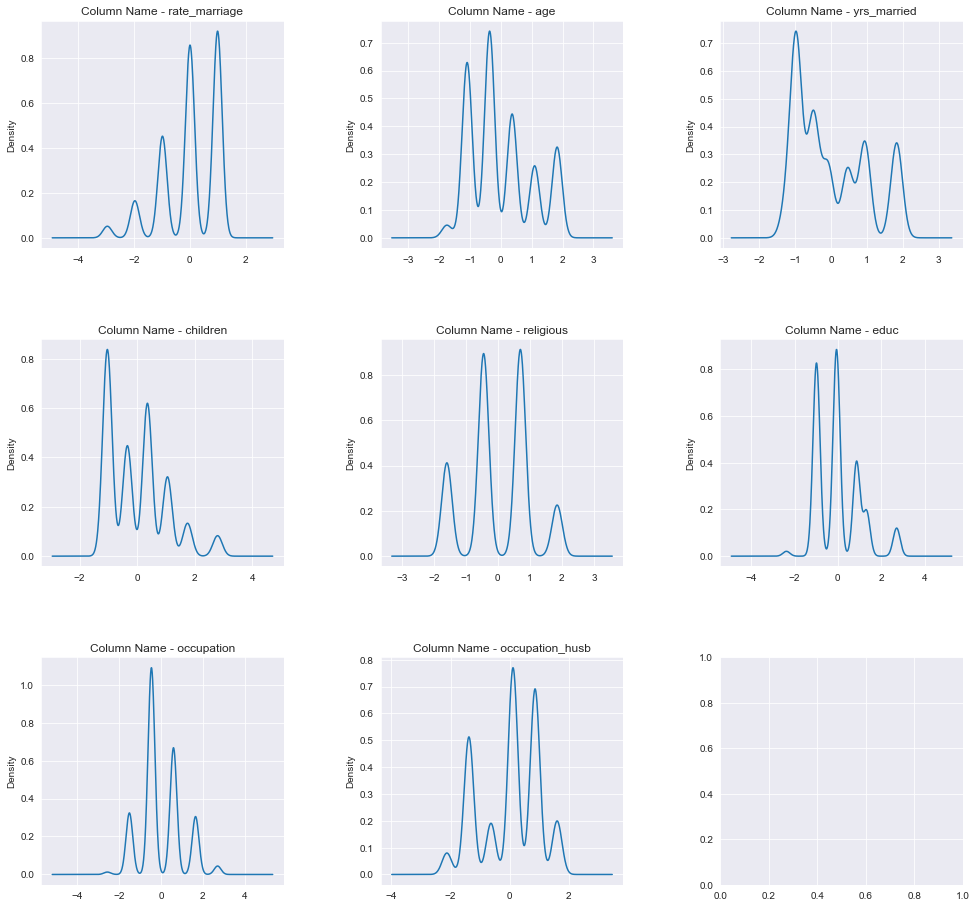

In [19]:
# Visualize the visualize the distribution for all the feature
fig, axes = plt.subplots(3,3,figsize=(16,15))
axe = axes.ravel()
for i,col in enumerate(std_dta.columns.tolist()):
    std_dta[col].plot(kind='kde',x=col,ax=axe[i],title='Column Name - {}'.format(col))

    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### Split the data into Train and Test

In [20]:
y = pd.DataFrame()
#y["affairs"] = dta["affairs"].astype(int)
y["affairs"] = (dta.affairs>0).astype(int)
x_train, x_test, y_train, y_test = train_test_split(std_dta[["rate_marriage","age","children","religious","educ","occupation","occupation_husb"]], y, test_size=0.25, random_state=355)
x_test

,rate_marriage,age,children,religious,educ,occupation,occupation_husb
8333,0.996979,1.824313,1.051300,0.700801,-0.990017,-0.457529,0.857189
7355,0.007115,1.824313,0.354820,-0.446714,-0.990017,-0.457529,-0.634311
7792,0.007115,-0.365066,1.051300,0.700801,0.860145,-0.457529,-1.380062
2210,0.996979,-0.365066,0.354820,-0.446714,-0.064936,-1.510810,-1.380062
264,-0.982750,0.364727,1.051300,-0.446714,-0.990017,-0.457529,-1.380062
...,...,...,...,...,...,...,...
5046,0.996979,-0.365066,0.354820,-1.594230,-0.064936,1.649034,0.857189
2932,0.996979,1.824313,0.354820,0.700801,-0.990017,1.649034,0.111439
5161,0.007115,1.824313,1.747780,1.848317,-0.064936,-0.457529,0.111439
2373,0.996979,-1.094858,-1.038139,-0.446714,-0.990017,-1.510810,-1.380062


In [21]:
# Apply logistic regression model in dataset
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [22]:
y_pred = log_reg.predict(x_train)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [23]:
# Accuracy check for train dataset
accuracy = accuracy_score(y_train,y_pred)
accuracy

0.6690369454320606

In [24]:
# Confusion matrix
conf_mat = confusion_matrix(y_train,y_pred)
conf_mat

array([[2267,  975],
       [1166, 2061]], dtype=int64)

In [25]:
# area under the curve for train data
auc_roc = roc_auc_score(y_train,y_pred)
auc_roc

0.6689667034794904

#### ROC

In [26]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

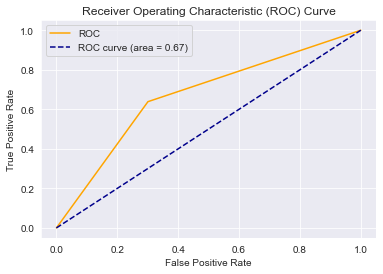

In [27]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_roc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [28]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [29]:
# Accuracy check for test dataset
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6703755215577191

In [30]:
# Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[740, 331],
       [380, 706]], dtype=int64)

In [31]:
# area under the curve for train data
auc_roc = roc_auc_score(y_test,y_pred)
auc_roc

0.670517562457764

#### ROC 

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

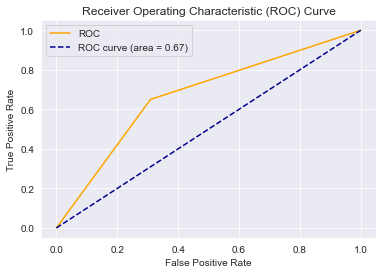

In [33]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_roc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [34]:
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

In [35]:
# Breaking down the formula for the accuracy
accuracy = (tp+tn)/(tp+fp+fn+tn)
accuracy

0.6703755215577191

In [36]:
# Precision
pre = tp/(tp+fp)
pre

0.6909430438842203

In [37]:
# Recall
rec = tp/(tp+fn)
rec

0.6607142857142857

In [38]:
# F1 Score
f1_score = 2*(rec*pre)/(rec+pre)
f1_score

0.6754906435417617

### Model calculation after label encoding.

In [39]:
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [40]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [41]:
# Up sampling the dataset
from imblearn.over_sampling import RandomOverSampler
rdm = RandomOverSampler()
X_res,y_res = rdm.fit_resample(X=X, y=y)
X = pd.concat([X_res,y_res],axis=1)
print("Data size for the 0 value :",X[X["affairs"]==0].shape)
print("Data size for the 1 value :",X[X["affairs"]==1].shape)

Data size for the 0 value : (4313, 18)
Data size for the 1 value : (4313, 18)


In [42]:
y = np.ravel(X["affairs"])

In [43]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,6.0,1.0,2.0,12.0,1.0
8622,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,27.0,9.0,2.0,3.0,14.0,1.0
8623,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,42.0,13.0,0.0,1.0,14.0,1.0
8624,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,32.0,2.5,0.0,2.0,14.0,1.0


In [44]:
# Apply Z-Score on datasets
for i,col in enumerate(X.drop(["affairs"],axis=1).columns.tolist()):
    zc = stats.zscore(X[col])
    X[col]=zc
X.drop(["affairs","Intercept"],axis=1,inplace=True)
X

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,2.556096,-0.896786,-0.61317,-0.377714,-0.136155,-0.515137,-0.290899,-0.678273,1.592246,-0.298105,-0.982750,0.364727,-0.084506,1.051300,0.700801,1.322686
1,-0.391222,1.115093,-0.61317,-0.377714,-0.136155,-0.515137,-0.290899,1.474333,-0.628044,-0.298105,-0.982750,-0.365066,0.461832,1.051300,-1.594230,-0.064936
2,-0.391222,1.115093,-0.61317,-0.377714,-0.136155,-0.515137,-0.290899,-0.678273,1.592246,-0.298105,0.007115,-1.094858,-0.972306,-1.038139,-1.594230,0.860145
3,-0.391222,-0.896786,-0.61317,2.647505,-0.136155,-0.515137,-0.290899,-0.678273,1.592246,-0.298105,0.007115,1.094520,0.939878,1.747780,0.700801,0.860145
4,-0.391222,1.115093,-0.61317,-0.377714,-0.136155,-0.515137,-0.290899,1.474333,-0.628044,-0.298105,0.996979,-0.365066,-0.084506,-0.341659,-1.594230,-0.064936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,-0.391222,1.115093,-0.61317,-0.377714,-0.136155,-0.515137,-0.290899,1.474333,-0.628044,-0.298105,-0.982750,-0.365066,-0.494260,-0.341659,-0.446714,-0.990017
8622,-0.391222,1.115093,-0.61317,-0.377714,-0.136155,-0.515137,3.437621,-0.678273,-0.628044,-0.298105,0.996979,-0.365066,-0.084506,0.354820,0.700801,-0.064936
8623,-0.391222,-0.896786,-0.61317,2.647505,-0.136155,-0.515137,-0.290899,-0.678273,1.592246,-0.298105,0.007115,1.824313,0.461832,-1.038139,-1.594230,-0.064936
8624,-0.391222,-0.896786,-0.61317,2.647505,-0.136155,-0.515137,-0.290899,-0.678273,-0.628044,3.354525,0.007115,0.364727,-0.972306,-1.038139,-0.446714,-0.064936


In [45]:
y = pd.DataFrame()
#y["affairs"] = dta["affairs"].astype(int)
y["affairs"] = (dta.affairs>0).astype(int)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=355)
y_train

,affairs
5155,0
1497,1
6913,1
8346,1
3714,0
...,...
3985,0
7459,1
7669,1
2690,0


In [46]:
# Apply logistic regression model in dataset
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [47]:
y_pred = log_reg.predict(x_train)

In [48]:
# Accuracy check for the training data
accuracy = accuracy_score(y_train,y_pred)
accuracy

0.6818673674447364

In [49]:
# Confusion matrix
conf_mat = confusion_matrix(y_train,y_pred)
conf_mat

array([[2313,  929],
       [1129, 2098]], dtype=int64)

In [50]:
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

In [51]:
# Accuracy check for the train datasets
acc = (tp+tn) / (tp+fp+fn+tn)
acc

0.6818673674447364

In [52]:
# Precision check
prec = tp / (tp+fp)
prec

0.7134484885872918

In [53]:
# Recall check
rec = tp / (tp+fn)
rec

0.6719930273097037

In [54]:
# F1 score
f1_score = 2*(prec * rec)/(prec+rec)
f1_score

0.6921005385996409

In [55]:
# Area under curve
auc_roc_score = roc_auc_score(y_train,y_pred)
auc_roc_score

0.6817939684956912

#### ROC

In [56]:
fpr, tpr, threshold = roc_curve(y_train,y_pred)

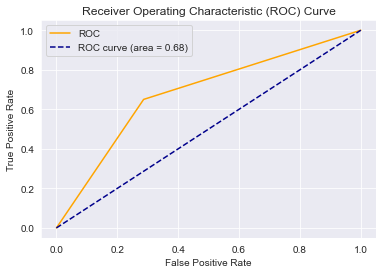

In [57]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_roc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [58]:
# Predection for the test datasets
y_pred = log_reg.predict(x_test)

In [59]:
# Accuracy check for the test dataset
acc = accuracy_score(y_test,y_pred)
acc

0.6801112656467315

In [60]:
# Confusion matrix for the test dataset
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[753, 318],
       [372, 714]], dtype=int64)

In [61]:
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

In [62]:
# Precesion for test dataset
prec = tp / (tp+fp)
prec

0.7030812324929971

In [63]:
# Recall for the test dataset
rec = tp / (tp+fn)
rec

0.6693333333333333

In [64]:
# F 1 score for the test dataset
f1_score = 2 * (rec * prec) / (rec+prec)
f1_score

0.6857923497267759

In [65]:
auc_roc_score = roc_auc_score(y_test,y_pred)
auc_roc_score

0.6802698980144544

#### ROC

In [66]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)

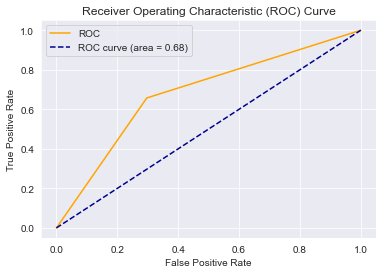

In [67]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_roc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Conclusion :- As per the above model report, all the performance mesurement score is same for without label encoded data and with label encoded dataset. So we can say model is consistent for both the case